# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent= 4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18843743,
            "id": 1,
            "last_updated": 1634232256,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1079011654686,
                    "percent_change_1h": -0.0855542118646295,
                    "percent_change_24h": 0.255638610056185,
                    "percent_change_7d": 3.29311935229063,
                    "percentage_change_1h": -0.0855542118646295,
                    "percentage_change_24h": 0.255638610056185,
                    "percentage_change_7d": 3.29311935229063,
                    "price": 57240.0,
                    "volume_24h": 37943901331
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18843743,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent= 4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 117925891,
            "id": 1027,
            "last_updated": 1634232217,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 447856465483,
                    "percent_change_1h": -0.382001650734949,
                    "percent_change_24h": 8.17717891322737,
                    "percent_change_7d": 5.72362875828047,
                    "percentage_change_1h": -0.382001650734949,
                    "percentage_change_24h": 8.17717891322737,
                    "percentage_change_7d": 5.72362875828047,
                    "price": 3797.78,
                    "volume_24h": 22593960828
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117925891,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The price of Bitcoin is ${btc_price}")

The price of Bitcoin is $57240.0


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f" the price for etherium is ${eth_price}")

 the price for etherium is $3797.78


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"The current value of your BTC holding is ${btc_value:.2f}")

The current value of your BTC holding is $68688.00


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The current value of your ETH holding is ${eth_value:.2f}")

The current value of your ETH holding is $20128.23


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Your current cryptocurrency wallet balance is ${total_crypto_wallet:.2f}")

Your current cryptocurrency wallet balance is $88816.23


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="V2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers= ["AGG", "SPY"]

# Set timeframe to 1D 
timeframe= "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date= pd.Timestamp("2021-10-12", tz ="America/New_york").isoformat()
end_date= pd.Timestamp("2021-10-12", tz ="America/New_york").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [17]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
).df

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-10-12 00:00:00-04:00  114.17  114.38  114.11  114.355  3521504  435.67   

                                                            
                            high     low   close    volume  
time                                                        
2021-10-12 00:00:00-04:00  436.1  432.78  433.63  61078594

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)

114.355


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(spy_close_price)

433.63


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolios is ${agg_value}")

The current value of the bond portfolios is $22871.0


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolios is ${spy_value}")

The current value of the stock portfolios is $47699.3


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portfolio is ${total_stocks_bonds}")

The current balance of the stock and bond portfolio is $70570.3


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print total portfolio value
print(f"The current total balance of your crypto currency wallet, and stock and bonds portfolio is ${total_portfolio:.2f}" )

The current total balance of your crypto currency wallet, and stock and bonds portfolio is $159386.53


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data    

[88816.234, 70570.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data = savings_data, columns= ["amount"], index= ["crypto", "stock/bond"])


# Display the savings_df DataFrame
# YOUR CODE HERE
display(savings_df)

,amount
crypto,88816.234
stock/bond,70570.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

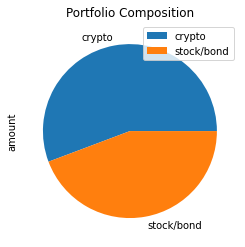

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y="amount", title= "Portfolio Composition")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income *3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congradulations, you have enough money in this fund!")
elif total_portfolio == emergency_fund_value:
    print("Congradulations on reaching this important financial goal!")
else: 
    print(f"you are short ${ emergency_fund_value - total_portfolio}")

Congradulations, you have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = "2017-08-07"
end_date = "2020-08-07"


# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [38]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_year_df = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
    limit= limit_rows
).df


# Display both the first and last five rows of the DataFrame
display(three_year_df.head())
display(three_year_df.tail())
tickers

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.20  1492997.0   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.11  2706969.0   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.00  1488075.0   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.24  1527412.0   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.53  1719161.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-24 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-25 00:00:00-04:00  256.19  256.31  254.00  255.30  72200254.0  
2017-10-26 00:00:00-04:00  255.99  256.30  255.56  255.59  37718330.0  
2017-10-27 00:00:00-04:00  256.50  257.89  256.16  257.68  49910859.0  
2017-10-30 00:00:00-04:00  257.07  257.60  256.41  256.80  37073374.0

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.120  4207570.0   
2021-10-11 00:00:00-04:00  114.01  114.065  113.940  113.940  1999518.0   
2021-10-12 00:00:00-04:00  114.17  114.380  114.110  114.355  3521504.0   
2021-10-13 00:00:00-04:00  114.43  114.640  114.415  114.610  5301180.0   
2021-10-14 00:00:00-04:00  114.70  114.846  114.630  114.765  2209822.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2021-10-08 00:00:00-04:00  439.48  439.89  437.19  437.82  57510090.0  
2021-10-11 00:00:00-04:00  437.16  440.26  434.62  434.67  54993389.0  
2021-10-12 00:00:00-04:00  435.67  436.10  432.78  433.63  61078594.0  
2021-10-13 00:00:00-04:00  434.71  436.05  431.54  435.13  63943229.0  
2021-10-14 00:00:00-04:00  439.08  442.27  438.58  442.26  35248150.0

['AGG', 'SPY']

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_60_40_portfolio = MCSimulation(
    portfolio_data = three_year_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30,
)


# Review the simulation input data

MC_60_40_portfolio.portfolio_data

AGG                                         \
                             open     high      low     close     volume   
time                                                                       
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.2000  1492997.0   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.1100  2706969.0   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.0000  1488075.0   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.2400  1527412.0   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.5300  1719161.0   
...                           ...      ...      ...       ...        ...   
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.1200  4207570.0   
2021-10-11 00:00:00-04:00  114.01  114.065  113.940  113.9400  1999518.0   
2021-10-12 00:00:00-04:00  114.17  114.380  114.110  114.3550  3521504.0   
2021-10-13 00:00:00-04:00  114.43  114.640  114.415  114.6100  5301180.0   
2021-10-14 00:00:00-04:00  114.70  114.846  114.630  114.7766  2200264.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-10-24 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-10-25 00:00:00-04:00    -0.000824  256.19  256.31  254.00  255.300   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.56  255.590   
2017-10-27 00:00:00-04:00     0.002202  256.50  257.89  256.16  257.680   
2017-10-30 00:00:00-04:00     0.002655  257.07  257.60  256.41  256.800   
...                                ...     ...     ...     ...      ...   
2021-10-08 00:00:00-04:00    -0.002099  439.48  439.89  437.19  437.820   
2021-10-11 00:00:00-04:00    -0.001577  437.16  440.26  434.62  434.670   
2021-10-12 00:00:00-04:00     0.003642  435.67  436.10  432.78  433.630   
2021-10-13 00:00:00-04:00     0.002230  434.71  436.05  431.54  435.130   
2021-10-14 00:00:00-04:00     0.001454  439.08  442.25  438.58  442.185   

                                                    
                               volume daily_return  
time                                                
2017-10-24 00:00:00-04:00         NaN          NaN  
2017-10-25 00:00:00-04:00  72200254.0          NaN  
2017-10-26 00:00:00-04:00  37718330.0     0.001136  
2017-10-27 00:00:00-04:00  49910859.0     0.008177  
2017-10-30 00:00:00-04:00  37073374.0    -0.003415  
...                               ...          ...  
2021-10-08 00:00:00-04:00  57510090.0    -0.001869  
2021-10-11 00:00:00-04:00  54993389.0    -0.007195  
2021-10-12 00:00:00-04:00  61078594.0    -0.002393  
2021-10-13 00:00:00-04:00  63943229.0     0.003459  
2021-10-14 00:00:00-04:00  35044315.0     0.016214  

[1001 rows x 12 columns]

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40_portfolio.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007357,0.996774,1.004890,0.998166,1.008012,1.002545,1.006303,0.989731,1.003108,1.000144,...,1.001978,0.997435,0.998268,1.004051,1.001395,0.993465,1.001290,0.993974,0.998300,1.013312
2,1.009058,0.998434,0.995848,0.994133,1.008982,1.007849,1.003886,1.001260,0.994377,0.989004,...,1.007978,1.000992,0.996623,0.998475,1.014469,0.995332,1.008577,0.992925,1.003608,1.012797
3,1.008838,0.999878,0.988900,0.992747,1.015948,1.011684,0.997948,1.001132,0.997453,1.000888,...,1.021995,0.992246,1.004140,1.004208,1.011025,0.997442,1.012329,0.991298,1.001256,1.012365
4,0.998492,0.989317,0.981885,0.992016,1.013580,1.011691,0.999666,0.998386,1.002591,0.992968,...,1.011425,0.983766,1.014409,0.995230,1.006883,1.002083,1.007008,0.994871,0.996368,1.017095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.842061,9.973892,11.376996,9.914839,11.729249,7.247510,9.057709,6.805712,6.041334,4.924721,...,7.081245,6.772872,7.653518,9.351176,10.642016,7.111894,7.545036,3.903633,10.087451,15.338827
7557,6.842358,10.042588,11.371646,9.922075,11.704546,7.283802,9.073949,6.766220,5.998948,4.960143,...,7.006768,6.734793,7.637069,9.412533,10.566625,7.075066,7.507238,3.883765,10.057915,15.051547
7558,6.867671,10.094207,11.291979,9.954892,11.797292,7.242558,9.066295,6.850798,5.965016,4.953302,...,7.069454,6.761130,7.589941,9.417726,10.612058,7.077422,7.510783,3.879068,10.040615,15.047314
7559,6.800915,10.131878,11.264306,10.032474,11.772013,7.177691,9.038384,6.881401,5.973591,4.939077,...,7.101545,6.650768,7.607312,9.364272,10.702200,7.045200,7.467458,3.850829,10.022101,15.024614


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

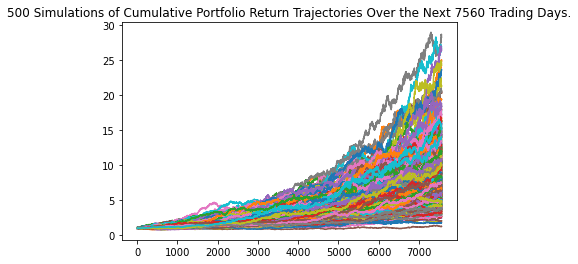

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_60_40_portfolio.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

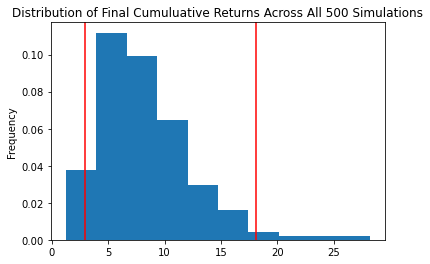

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_60_40_portfolio.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_60_40_summary_table =MC_60_40_portfolio.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_60_40_summary_table

count           500.000000
mean              8.265847
std               4.120077
min               1.236155
25%               5.340200
50%               7.401640
75%              10.468350
max              28.247122
95% CI Lower      2.960429
95% CI Upper     18.154174
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

- What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that i generated from the Monte Carlo simulation, with a 95% confidence interval, the lower bound expected value is 225633.69 and the upper bound is expected value is 1326744.73.

In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock portfolios is ${spy_value}")
print(f"The current value of the bond portfolios is ${agg_value}")
print(f"The current balance of the stock and bond portfolio is ${total_stocks_bonds}")

The current value of the stock portfolios is $47699.3
The current value of the bond portfolios is $22871.0
The current balance of the stock and bond portfolio is $70570.3


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_60_40_summary_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_60_40_summary_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the portfolio"
      f" with a 60% weight in the S&P 500 and 40% in AGG bonds over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of 70570.3 in the portfolio with a 60% weight in the S&P 500 and 40% in AGG bonds over the next 30 years will end within in the range of $208918.33 and $1281145.48.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [45]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_80_20_portfolio = MCSimulation(
    portfolio_data = three_year_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10,
)


# Review the simulation input data
MC_80_20_portfolio.portfolio_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.200  1492997.0   
2017-10-25 00:00:00-04:00  108.96  109.130  108.950  109.110  2706969.0   
2017-10-26 00:00:00-04:00  109.20  109.229  108.980  109.000  1488075.0   
2017-10-27 00:00:00-04:00  109.07  109.260  109.035  109.240  1527412.0   
2017-10-30 00:00:00-04:00  109.43  109.560  109.360  109.530  1719161.0   
...                           ...      ...      ...      ...        ...   
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.120  4207570.0   
2021-10-11 00:00:00-04:00  114.01  114.065  113.940  113.940  1999518.0   
2021-10-12 00:00:00-04:00  114.17  114.380  114.110  114.355  3521504.0   
2021-10-13 00:00:00-04:00  114.43  114.640  114.415  114.610  5301180.0   
2021-10-14 00:00:00-04:00  114.70  114.846  114.630  114.800  1828718.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2017-10-24 00:00:00-04:00          NaN     NaN     NaN     NaN       NaN   
2017-10-25 00:00:00-04:00    -0.000824  256.19  256.31  254.00  255.3000   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.56  255.5900   
2017-10-27 00:00:00-04:00     0.002202  256.50  257.89  256.16  257.6800   
2017-10-30 00:00:00-04:00     0.002655  257.07  257.60  256.41  256.8000   
...                                ...     ...     ...     ...       ...   
2021-10-08 00:00:00-04:00    -0.002099  439.48  439.89  437.19  437.8200   
2021-10-11 00:00:00-04:00    -0.001577  437.16  440.26  434.62  434.6700   
2021-10-12 00:00:00-04:00     0.003642  435.67  436.10  432.78  433.6300   
2021-10-13 00:00:00-04:00     0.002230  434.71  436.05  431.54  435.1300   
2021-10-14 00:00:00-04:00     0.001658  439.08  442.16  438.58  442.0199   

                                                    
                               volume daily_return  
time                                                
2017-10-24 00:00:00-04:00         NaN          NaN  
2017-10-25 00:00:00-04:00  72200254.0          NaN  
2017-10-26 00:00:00-04:00  37718330.0     0.001136  
2017-10-27 00:00:00-04:00  49910859.0     0.008177  
2017-10-30 00:00:00-04:00  37073374.0    -0.003415  
...                               ...          ...  
2021-10-08 00:00:00-04:00  57510090.0    -0.001869  
2021-10-11 00:00:00-04:00  54993389.0    -0.007195  
2021-10-12 00:00:00-04:00  61078594.0    -0.002393  
2021-10-13 00:00:00-04:00  63943229.0     0.003459  
2021-10-14 00:00:00-04:00  29331690.0     0.015834  

[1001 rows x 12 columns]

In [46]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80_20_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003882,0.998354,1.002605,0.997152,0.996377,0.992202,1.000690,0.998034,1.002925,1.005174,...,1.003644,0.998715,1.000061,1.004079,1.004659,1.000294,0.997909,0.998232,0.998544,0.997844
2,1.008725,0.996315,1.001660,1.011113,0.994377,0.988928,1.004869,1.001439,0.998848,1.004037,...,1.007889,0.998081,1.002744,0.999138,1.002118,0.996132,1.005464,0.987464,0.992453,0.998526
3,1.003675,0.999477,1.008931,1.016547,0.997395,0.985379,1.005192,1.002440,0.997599,1.004383,...,1.003283,1.002928,1.008852,0.992804,1.007185,0.995080,0.996596,0.985842,0.995692,0.998220
4,1.004721,1.001886,1.007060,1.015746,0.991014,0.987052,1.000704,1.004233,0.994397,1.010241,...,1.003262,0.998822,1.008036,0.989557,1.012229,0.988239,0.999497,0.992537,0.994534,1.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.132576,1.929974,1.899301,1.878495,1.596859,2.303195,1.867260,1.432996,1.399228,1.396939,...,1.276157,1.471927,1.231367,1.821095,1.691110,1.452894,1.507138,1.627664,1.600762,1.344381
2517,1.134995,1.920965,1.898088,1.882738,1.586569,2.314794,1.870021,1.438124,1.408422,1.390538,...,1.276099,1.465002,1.231683,1.820275,1.698944,1.452082,1.512684,1.615966,1.592363,1.344904
2518,1.130225,1.922031,1.902475,1.882259,1.589772,2.316503,1.871372,1.437569,1.415210,1.387589,...,1.273415,1.452257,1.229366,1.826148,1.693629,1.451375,1.520489,1.614553,1.602079,1.342061
2519,1.133844,1.923062,1.904575,1.883804,1.593240,2.309028,1.886034,1.438928,1.411956,1.385302,...,1.281687,1.456150,1.224531,1.825999,1.694110,1.462148,1.512727,1.616494,1.604715,1.341229


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

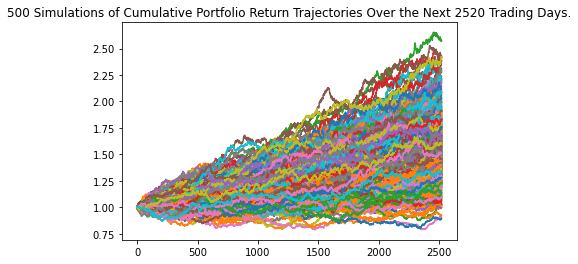

In [62]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_80_20_portfolio.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

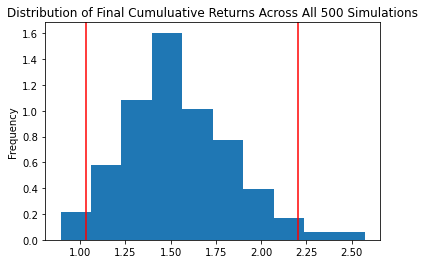

In [48]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_80_20_portfolio.plot_distribution()

In [52]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_80_20_summary_table = MC_80_20_portfolio.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_80_20_summary_table

count           500.000000
mean              1.539427
std               0.290658
min               0.891873
25%               1.350857
50%               1.514311
75%               1.721819
max               2.573188
95% CI Lower      1.029998
95% CI Upper      2.205636
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that i generated from the Monte Carlo simulation, with a 95% confidence interval, the lower bound expected value is \\$72687.3 and the upper bound is expected value is \\$155652.4.

In [64]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock portfolios is ${spy_value}")
print(f"The current value of the bond portfolios is ${agg_value}")
print(f"The current balance of the stock and bond portfolio is ${total_stocks_bonds}")

The current value of the stock portfolios is $47699.3
The current value of the bond portfolios is $22871.0
The current balance of the stock and bond portfolio is $70570.3


In [58]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_80_20_summary_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_80_20_summary_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the portfolio"
      f" with a 80% weight in the S&P 500 and 20% in AGG bonds over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an initial investment of 70570.3 in the portfolio with a 80% weight in the S&P 500 and 20% in AGG bonds over the next 10 years will end within in the range of $72687.3 and $155652.4.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

After reviewing the Monte Carlo simulation for both ten years and thirty years, it seems like weighting the portfolio more heavily to stocks will not allow the credit union members to retire after only 10 years.
Using a thirty year simulation, i found that there is a 95% chance that an initial investment of 70570.3 in the portfolio with a 60% weight in the S&P 500 and 40% in AGG bonds over the next 30 years will end within in the range of \\$225633.69 and \\$1326744.73.
Using the ten year simulation, i found that there is a 95% chance that an initial investment of 70570.3 in the portfolio with a 80% weight in the S&P 500 and 20% in AGG bonds over the next 10 years will end within in the range of \\$72687.3 and \\$155652.4. It seems that the member is well better off leaving his investment for thirty years, as even if he allocated 80% stocks and 20% bonds over ten years, we can derive from both simulations that he will retire wealthier going with a 60/40 split between stocks and bonds, over thirty years. 